In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats, scipy.interpolate

### Task 2a

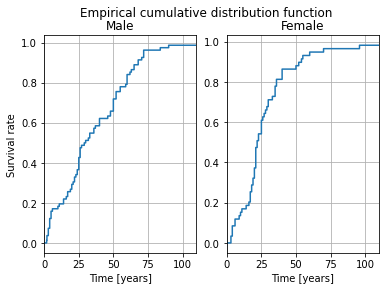

In [197]:
time = pd.read_csv(
    'https://www.uio.no/studier/emner/matnat/math/STK1100/data/egypt_data.txt',
    header=None
)

t_m = np.asarray(time[:82]).flatten()
t_f = np.asarray(time[82:]).flatten()

def empirical_cdf(x):
    return scipy.interpolate.interp1d(
                np.sort(x), 
                np.arange(len(x))/float(len(x)), 
                kind = 'zero', 
                fill_value = 'extrapolate'
            )

fig, ax = plt.subplots(ncols=2, sharex=True)
fig.suptitle('Empirical cumulative distribution function')
z = np.linspace(0, 110, 1000)

F_m = empirical_cdf(t_m)
ax[0].step(z, F_m(z))
ax[0].set(
    xlabel = 'Time [years]',
    ylabel = 'Survival rate',
    title = 'Male',
    xlim = (0, 110)
)
ax[0].grid()

F_f = empirical_cdf(t_f)
ax[1].step(z, F_f(z))
ax[1].set(
    xlabel = 'Time [years]',
    title = 'Female',
    xlim = (0, 110)
)
ax[1].grid()

plt.show()

### Task 2b

In [198]:
def estimate_moments_gamma(t):
    t_fean = np.mean(t)
    s_sq = np.var(t)

    beta = s_sq / t_fean
    alpha = t_fean / beta
    Ex = alpha * beta

    return alpha, beta, Ex

alpha_m, beta_m, Ex_m = estimate_moments_gamma(t_f)
alpha_f, beta_f, Ex_f = estimate_moments_gamma(t_f)

print(f'Gender: Male')
print(f'Alpha = {alpha_m:.3f}')
print(f'Beta = {beta_m:.3f}')
print(f'E(X) = {Ex_m:.2f} years \n')

print(f'Gender: Male')
print(f'Alpha = {alpha_f:.3f}')
print(f'Beta = {beta_f:.3f}')
print(f'E(X) = {Ex_f:.2f} years')

Gender: Male
Alpha = 2.240
Beta = 11.572
E(X) = 25.92 years 

Gender: Male
Alpha = 2.240
Beta = 11.572
E(X) = 25.92 years


### Task 2d

In [199]:
def estimate_moments_lognormal(t):
    t_mean = np.mean(t)
    s_sq = np.var(t)

    sigma_sq = np.log(s_sq/(t_mean**2) + 1)
    mu = np.log(t_mean) - sigma_sq/2
    Ex = np.exp(mu + sigma_sq/2)

    return mu, sigma_sq, Ex

mu_m, sigma_sq_m, Ex_m = estimate_moments_lognormal(t_m)
mu_f, sigma_sq_f, Ex_f = estimate_moments_lognormal(t_f)

print(f'Gender: Male')
print(f'Mu = {mu_m:.3f}')
print(f'Sigma^2 = {sigma_sq_m:.3f}')
print(f'E(T) = {Ex_m:.2f} years \n')

print(f'Gender: Female')
print(f'Mu = {mu_f:.3f}')
print(f'Sigma^2 = {sigma_sq_f:.3f}')
print(f'E(T) = {Ex_f:.2f} years')

Gender: Male
Mu = 3.343
Sigma^2 = 0.373
E(T) = 34.12 years 

Gender: Female
Mu = 3.071
Sigma^2 = 0.369
E(T) = 25.92 years


### Task 2e

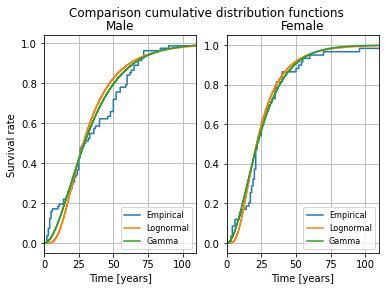

In [200]:
fig, ax = plt.subplots(ncols=2, sharex=True)
fig.suptitle('Comparison cumulative distribution functions')
z = np.linspace(0, 110, 1000)

for i, t in enumerate((t_m, t_f)):
    F = empirical_cdf(t)
    ax[i].step(z, F(z), label='Empirical')

    mu, sigma_sq, Ex = estimate_moments_lognormal(t)
    ax[i].step(z, scipy.stats.lognorm.cdf(z, s=np.sqrt(sigma_sq), scale=np.exp(mu)), label='Lognormal')

    alpha, beta, Ex = estimate_moments_gamma(t)
    ax[i].step(z, scipy.stats.gamma.cdf(z, a=alpha, scale=beta), label='Gamma')

    ax[i].grid('True')
    ax[i].legend(loc='lower right', prop={'size': 8})

ax[0].set(
    xlabel = 'Time [years]',
    ylabel = 'Survival rate',
    title = 'Male',
    xlim = (0, 110)
)

ax[1].set(
    xlabel = 'Time [years]',
    title = 'Female',
    xlim = (0, 110)
)

plt.show()

### Task 3d

Analytical median = 12.476
Calculated median = 12.365


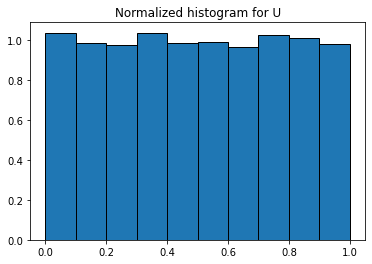

In [201]:
n = 10_000
lmbda = 48
alpha = 3

def F(x, lmbda=48, alpha=3):
    return 1 - (1 + x/lmbda)**(-alpha) * (x>0)

u = np.random.uniform(0, 1, n)
plt.hist(u, density=True, edgecolor='black')
plt.title('Normalized histogram for U')

x = scipy.stats.lomax(c=alpha, scale=lmbda)
X = x.rvs(size=n)
print(f'Analytical median = {x.median():.3f}')
print(f'Calculated median = {np.median(X):.3f}')

plt.show()

### Task 3e

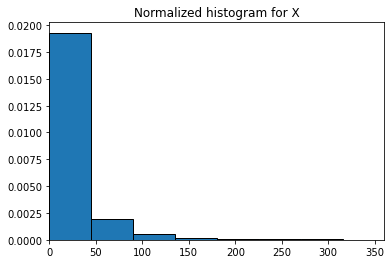

In [202]:
plt.hist(X, bins=50, density=True, edgecolor='black')
plt.title('Normalized histogram for X')
plt.xlim(0, 360)
plt.show()

### Task 3f

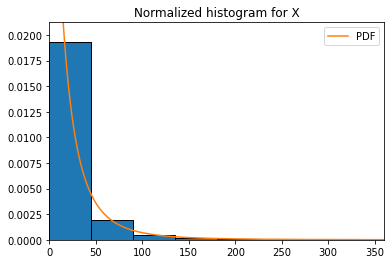

In [203]:
# copy code from last cell

y, *_ = plt.hist(X, bins=50, density=True, edgecolor='black')

t = np.linspace(0, 360, n)
plt.plot(t, x.pdf(t), label='PDF')

plt.title('Normalized histogram for X')
plt.xlim(0, 360)
plt.ylim(None, 1.1*y.max())
plt.legend()
plt.show()